In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# after installing pandas profilling restart runtime/kernel then run other cells 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 146 kB/s
     |████████████████████████████████| 102 kB 10.1 MB/s 
     |████████████████████████████████| 679 kB 53.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 9.9 MB 60.6 MB/s 
     |████████████████████████████████| 4.7 MB 83.9 MB/s 
     |████████████████████████████████| 296 kB 75.7 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328499 sha256=40dcd97f76e2b3ae96545a9def05763da1fc80860bbd79a959a54687a717d08e
  Stored in directory: /tmp/pip-ephem-wheel-cache-hypoun0f/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=137473f0a1358b158ba132f4f816b479341ff763e22641aaed9daaad009abb22
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764

In [2]:
!pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 990 kB/s 


In [3]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 7.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626462 sha256=db03f9ab025737884f5d392918cbfdd38c8644269faabcd365914a04b644a0b7
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


# Recommendation Systems

* **DOMAIN:** Smartphone, Electronics

* **CONTEXT:** India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

* **DATA DESCRIPTION:**
    * author : name of the person who gave the rating
    * country : country the person who gave the rating belongs to
    * data : date of the rating
    * domain: website from which the rating was taken from
    * extract: rating content
    * language: language in which the rating was given
    * product: name of the product/mobile phone for which the rating was given
    * score: average rating for the phone
    * score_max: highest rating given for the phone
    * source: source from where the rating was taken

* **PROJECT OBJECTIVE:** We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

### Steps and tasks:

# 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. 

## A. Merge all the provided CSVs into one dataFrame.

In [4]:
# Import Necessary Libraries

import numpy as np
import pandas as pd

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount("/content/drive")

# Fast_ML Library
from fast_ml import eda

# Import each CSV provided
df1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/phone_user_review_file_1.csv', encoding='latin1')
df2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/phone_user_review_file_2.csv', encoding='latin1')
df3=pd.read_csv('/content/drive/My Drive/Colab Notebooks/phone_user_review_file_3.csv', encoding='latin1')
df4=pd.read_csv('/content/drive/My Drive/Colab Notebooks/phone_user_review_file_4.csv', encoding='latin1')
df5=pd.read_csv('/content/drive/My Drive/Colab Notebooks/phone_user_review_file_5.csv', encoding='latin1')
df6=pd.read_csv('/content/drive/My Drive/Colab Notebooks/phone_user_review_file_6.csv', encoding='latin1')

# Display head for each file
# file1.head()
frames=[df1,df2,df3,df4,df5,df6]

# Merge all the provided CSVs into one dataFrame.
df_master = pd.concat(frames, ignore_index=True)
print(df_master)

Mounted at /content/drive
                                 phone_url       date lang country  \
0           /cellphones/samsung-galaxy-s8/   5/2/2017   en      us   
1           /cellphones/samsung-galaxy-s8/  4/28/2017   en      us   
2           /cellphones/samsung-galaxy-s8/   5/4/2017   en      us   
3           /cellphones/samsung-galaxy-s8/   5/2/2017   en      us   
4           /cellphones/samsung-galaxy-s8/  5/11/2017   en      us   
...                                    ...        ...  ...     ...   
1415128  /cellphones/alcatel-ot-club_1187/  5/12/2000   de      de   
1415129  /cellphones/alcatel-ot-club_1187/  5/11/2000   de      de   
1415130  /cellphones/alcatel-ot-club_1187/   5/4/2000   de      de   
1415131  /cellphones/alcatel-ot-club_1187/   5/1/2000   de      de   
1415132  /cellphones/alcatel-ot-club_1187/  4/25/2000   de      de   

                   source               domain  score  score_max  \
0        Verizon Wireless  verizonwireless.com   10.0       10.0 

## B. Explore, understand the Data and share at least 2 observations.

In [5]:
df_master.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [6]:
df_master.shape

(1415133, 11)

In [7]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


In [8]:
eda.df_info(df_master)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
phone_url,object,Categorical,5556,"[/cellphones/samsung-galaxy-s8/, /cellphones/s...",0,0.0
date,object,Categorical,7728,"[5/2/2017, 4/28/2017, 5/4/2017, 5/11/2017, 5/1...",0,0.0
lang,object,Categorical,22,"[en, he, fi, it, no, nl, ru, cs, sv, es]",0,0.0
country,object,Categorical,42,"[us, gb, au, in, il, fi, it, no, nl, ru]",0,0.0
source,object,Categorical,331,"[Verizon Wireless, Phone Arena, Amazon, Samsun...",0,0.0
domain,object,Categorical,384,"[verizonwireless.com, phonearena.com, amazon.c...",0,0.0
score,float64,Numerical,86,"[10.0, 6.0, 9.2, 4.0, 8.0, 2.0, 9.6, 7.2, 6.8,...",63489,4.486433
score_max,float64,Numerical,1,"[10.0, nan]",63489,4.486433
extract,object,Categorical,1321353,[As a diehard Samsung fan who has had every Sa...,19361,1.36814
author,object,Categorical,801103,"[CarolAnn35, james0923, R. Craig, Buster2020 ,...",63202,4.466153


In [9]:
df_master.describe(include='all')

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
count,1415133,1415133,1415133,1415133,1415133,1415133,1.351644e+06,1351644.0,1395772,1351931,1415132
unique,5556,7728,22,42,331,384,NaN,NaN,1321353,801103,61313
top,/cellphones/samsung-galaxy-s-iii/,7/18/2016,en,us,Amazon,amazon.com,NaN,NaN,#NAME?,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)"
freq,17093,3244,554746,318435,728471,214776,NaN,NaN,667,76978,5226
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.007060e+00,10.0,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.616121e+00,0.0,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e-01,10.0,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.200000e+00,10.0,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,9.200000e+00,10.0,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,10.0,NaN,NaN,NaN


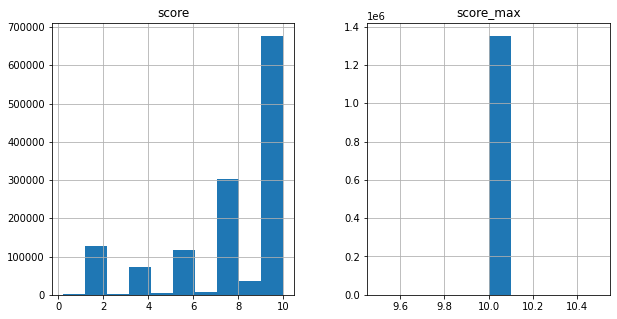

In [10]:
# Univariate Analysis - Plot histogram
df_master.hist(figsize=(10,5));

In [11]:
#Takes to much time and ram 
'''# Import Library
from pandas_profiling import ProfileReport

# Perform Pandas Profiling
profile = ProfileReport(df_master, title="EDA - Mobile Phone Recommendation")
profile'''

'# Import Library\nfrom pandas_profiling import ProfileReport\n\n# Perform Pandas Profiling\nprofile = ProfileReport(df_master, title="EDA - Mobile Phone Recommendation")\nprofile'

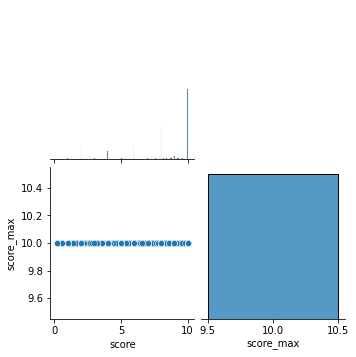

In [12]:
# Make pairplot of numerical data
sns.pairplot(data=df_master, corner=True);

**OBSERVATIONS**
* Samsung Galaxy S III is the most common phone url.
* English is the most common/frequent language in which the reviews have been written.
* Most of the reviews are from the US.
* Over 50% of the source is from Amazon. The most common domain is amazon.com
* 10 is the most common score given by the reviewers. Some scores are in decimal. Around 4% of the data in scores column is missing which would need treatment.
* Lenovo Vibe K4 Note (White,16GB) is the most commonly reviewed product.

## C. Round off scores to the nearest integers.

In [13]:
# Use round function in pandas
df_master = df_master.round({"score":0, "score_max":0})
df_master

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy


## D. Check for missing values. Impute the missing values, if any.

In [14]:
# Check which columns have missing values
df_master.isna().any()

phone_url    False
date         False
lang         False
country      False
source       False
domain       False
score         True
score_max     True
extract       True
author        True
product       True
dtype: bool

In [15]:
# Numerical columns score and score_max can be imputed with median score values of respecive columns
# These columns also have over 4% missing values. So it makes sense to impute them with the median
df_master['score'] = df_master['score'].fillna(df_master['score'].median())
df_master['score_max'] = df_master['score_max'].fillna(df_master['score_max'].median())

# Check for missing values
df_master.isna().any()

phone_url    False
date         False
lang         False
country      False
source       False
domain       False
score        False
score_max    False
extract       True
author        True
product       True
dtype: bool

In [16]:
# Extract, Author and Product Columns are Categorical Variables
# There is no way we can predict what would be the extract written by an author for a particular product.
# Product has only 1 missing value but Extract and Author have over 4%.
# We don't have any basis to assume that an author will write the same extract
# Or even that that the same author will write an extract.
# We can use ffill method in fillna() but since we don't have any basis, we'll just drop the missing rows
df_master.dropna(inplace=True)

# Check for missing values
df_master.isna().any()

phone_url    False
date         False
lang         False
country      False
source       False
domain       False
score        False
score_max    False
extract      False
author       False
product      False
dtype: bool

## E. Check for duplicate values and remove them, if any. 

In [17]:
# From pandas profiling we know there are duplicate rows
# Selecting duplicate rows except first occurrence based on all columns
duplicate = df_master[df_master.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
1395209,/cellphones/nokia-6310i/,7/22/2011,ru,ru,Yandex,market.yandex.ru,10.0,10.0,ÐÑÐµÐ½Ñ Ð¶Ð°Ð»ÐµÑ Ð¾Ð± ÑÑÑÐ°ÑÐµ ÑÑÐ¾...,alienwarfiend,Nokia 6310i
1395255,/cellphones/nokia-6310i/,11/19/2009,ru,ru,Yandex,market.yandex.ru,10.0,10.0,"Ð£ Ð¼ÐµÐ½Ñ ""NOKIA 6310i"" ÑÐ¶Ðµ Ð±Ð¾Ð»ÐµÐµ 3-...",Yurigin70,Nokia 6310i
1398120,/cellphones/nokia-8850/,8/23/2014,ru,ru,Yandex,market.yandex.ru,10.0,10.0,ÐÐ°Ð½Ð½ÑÐ¹ Ð¾ÑÐ·ÑÐ² Ð½Ð°Ð¿Ð¸ÑÐ°Ð½ Ð»Ð¸ÑÑ...,ÐÐ²Ð°Ð½Ð¾Ð² ÐÐµÐ½Ð¸Ñ,Nokia 8850
1410207,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,9.0,10.0,varsa satan 05312614607,muhsin,Samsung (936) SGH-600


In [18]:
# dropping all duplicate values except the first entry
df_master.drop_duplicates(keep='first',inplace=True)

# Check for duplicates
duplicate = df_master[df_master.duplicated()]
duplicate

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


## F. Keep only 1 Million data samples. Use random state=612.

In [19]:
df_sample = df_master.sample(n=1000000,random_state=612)
df_sample

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
8765,/cellphones/samsung-galaxy-s7-edge/,5/23/2016,en,us,Samsung,samsung.com,10.0,10.0,I love this phone. Very fast no problems since...,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint)
233365,/cellphones/asus-zenfone-2-ze551ml/,2/20/2017,it,it,Amazon,amazon.it,10.0,10.0,"QualitÃ prezzo davvero ottimo, rispetto ai pi...",Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
145859,/cellphones/huawei-mate-s/,1/14/2017,he,il,Zap.il,zap.co.il,10.0,10.0,×§× ××ª× ××ª ××××©××¨ ×1500 ×©:× ××...,ron,×××¤×× ×¡××××¨× Huawei Mate S 32GB
1203260,/cellphones/sony-ericsson-w395/,5/28/2009,de,de,Amazon,amazon.de,8.0,10.0,Ich habe dieses Handy am 30.3. bei amazon erwo...,katha_maria93,Sony Ericsson W395 blush titanium Handy
1205666,/cellphones/apple-iphone-3g/,2/6/2009,en,gb,Amazon,amazon.co.uk,2.0,10.0,There not unock t to any network and not engli...,paul george,Apple iPhone 3G 8GB SIM-Free - Black
...,...,...,...,...,...,...,...,...,...,...,...
351525,/cellphones/samsung-galaxy-s5/,1/29/2015,it,it,Amazon,amazon.it,10.0,10.0,Gentilezza e professionalitÃ impeccabile; ven...,irene,"Samsung G900 Galaxy S5 Smartphone, 16 GB, Nero..."
1161149,/cellphones/sony-ericsson-aino/,11/3/2010,ru,ru,Yandex,market.yandex.ru,10.0,10.0,ÐÐ¾Ð´Ð°ÑÐ¸Ð»Ð¸ Ð½Ð° Ð´ÐµÐ½Ñ ÑÐ¾Ð¶Ð´ÐµÐ½Ð¸Ñ...,anaid96,Sony Ericsson Aino
296533,/cellphones/htc-one-a9-16gb/,11/29/2015,en,in,Amazon,amazon.in,8.0,10.0,Too good phone...very good competition to Appl...,Shrijith Menon,HTC One A9 (Carbon Grey)
416075,/cellphones/sony-xperia-z3-compact/,11/25/2014,en,gb,Amazon,amazon.co.uk,6.0,10.0,Phone works really well but it has some Vodafo...,Ms. C. M. Nichols,Sony Xperia Z3 Compact UK SIM-Free Smartphone ...


In [20]:
df_sample.shape

(1000000, 11)

## G. Drop irrelevant features. Keep features like Author, Product, and Score. 

In [21]:
# Except Author, Product & Score, no other variables are relevant for model building
df1 = df_sample.drop(['phone_url','lang','country','source','domain','score_max','extract','date'], axis=1)
df1.head()

,score,author,product
8765,10.0,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint)
233365,10.0,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
145859,10.0,ron,×××¤×× ×¡××××¨× Huawei Mate S 32GB
1203260,8.0,katha_maria93,Sony Ericsson W395 blush titanium Handy
1205666,2.0,paul george,Apple iPhone 3G 8GB SIM-Free - Black


# 2. Answer the following questions.

## A. Identify the most rated products. 

In [22]:
df1['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3913
Lenovo Vibe K4 Note (Black, 16GB)    3228
OnePlus 3 (Graphite, 64 GB)          3127
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

* Lenovo Vibe K4 Note (White,16GB) is the most rated product. Other high rated products are in the above cell.

## B. Identify the users with most number of reviews.

In [23]:
df1['author'].value_counts().head()

Amazon Customer    57801
Cliente Amazon     14656
e-bit               6260
Client d'Amazon     5715
Amazon Kunde        3563
Name: author, dtype: int64

* Amazon Customer has made the most number of reviews followed by Cliente Amazon, e-bit, Client d'Amazon and Amazon Kunde.

## C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. 

In [24]:
# Look for the products having more than 50 ratings
prod_count = df1[["product","author"]].groupby("product").count()
prod_count = prod_count[prod_count["author"] > 50]
print(prod_count.head())

                                                    author
product                                                   
3220                                                    57
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(96...      81
6126 / 6131 / 6133                                      97
6682 / 6681                                             61
AICEK Coque ASUS ZenFone 2 ZE550ML/ZE551ML, AIC...      51


In [25]:
# Look for the authors who have given more than 50 ratings
author_count = df1[["product","author"]].groupby("author").count()
author_count = author_count[author_count["product"] > 50]
print(author_count.head())

                    product
author                     
#                       156
.                        57
91mobiles Customer       52
????????                216
??????????              256


In [26]:
# Keep only the popular products and authors
df1 = df1[df1["author"].isin(author_count.index) & df1["product"].isin(prod_count.index)]
print(df1)

         score           author  \
233365    10.0   Cliente Amazon   
537487     2.0  Amazon Customer   
518771    10.0     einem Kunden   
353663     8.0  Client d'Amazon   
224123     8.0  Amazon Customer   
...        ...              ...   
177801    10.0   Cliente Amazon   
505475    10.0  Amazon Customer   
1170634    9.0           Capyto   
577011     6.0          Gustavo   
287871     8.0  Amazon Customer   

                                                   product  
233365   Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...  
537487                      Apple iPhone 5s (Silver, 16GB)  
518771   ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...  
353663   Aukru Chargeur de batterie adaptateur Pour Sam...  
224123        Motorola Moto G 3rd Generation (Black, 16GB)  
...                                                    ...  
177801   Huawei P8 lite Smartphone, Display 5.0" IPS, D...  
505475   Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...  
1170634                       

In [27]:
# Create final dataframe
df_final = pd.DataFrame(df1)
df_final

,score,author,product
233365,10.0,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
537487,2.0,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)"
518771,10.0,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di..."
353663,8.0,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...
224123,8.0,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)"
...,...,...,...
177801,10.0,Cliente Amazon,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D..."
505475,10.0,Amazon Customer,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...
1170634,9.0,Capyto,Samsung M150 Cep Telefonu
577011,6.0,Gustavo,Huawei Ascend Y330 - Smartphone libre Android ...


In [28]:
# Final shape of dataset
df_final.shape

(109237, 3)

# 3. Build a popularity based model and recommend top 5 mobile phones.

In [29]:
#Count of authors for each unique mobile phone as recommendation score 
df_final_grouped = df_final.groupby('product').agg({'author': 'count'}).reset_index()
df_final_grouped.rename(columns = {'author': 'score'},inplace=True)
df_final_grouped.head()

,product,score
0,3220,1
1,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,4
2,"AICEK Coque ASUS ZenFone 2 ZE550ML/ZE551ML, AI...",24
3,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui...",18
4,"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui...",67


In [30]:
#Sort the mobile phones on recommendation score 
df_final_sorted = df_final_grouped.sort_values(['score', 'product'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
df_final_sorted['Rank'] = df_final_sorted['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_top5mobilephones = df_final_sorted.head(5) 
popularity_top5mobilephones 

,product,score,Rank
1523,"Lenovo Vibe K4 Note (White,16GB)",2338,1.0
1522,"Lenovo Vibe K4 Note (Black, 16GB)",1900,2.0
2385,"OnePlus 3 (Graphite, 64 GB)",1433,3.0
2386,"OnePlus 3 (Soft Gold, 64 GB)",1317,4.0
1524,"Lenovo Vibe K5 (Gold, VoLTE update)",1157,5.0


In [31]:
# Top 5 Mobile Phones based on Mean/Average Scores, Sorted Descendingly by Number of Reviews
df_final.groupby('product')['score'].count().sort_values(ascending=False).head()
popular_phones_mean_count = pd.DataFrame(df_final.groupby('product')['score'].mean())
popular_phones_mean_count['number_of_reviews'] = pd.DataFrame(df_final.groupby('product')['score'].count())
popular_phones_mean_count.sort_values(by=['number_of_reviews','score'],ascending=False).head()

,score,number_of_reviews
product,,
"Lenovo Vibe K4 Note (White,16GB)",6.994867,2338
"Lenovo Vibe K4 Note (Black, 16GB)",7.026316,1900
"OnePlus 3 (Graphite, 64 GB)",8.499651,1433
"OnePlus 3 (Soft Gold, 64 GB)",8.338648,1317
"Lenovo Vibe K5 (Gold, VoLTE update)",6.610199,1157


In [32]:
# Top 5 Mobile Phones based on Mean/Average Scores, Sorted Descendingly by Score
df_final.groupby('product')['score'].count().sort_values(ascending=False).head()
popular_phones_mean_count = pd.DataFrame(df_final.groupby('product')['score'].mean())
popular_phones_mean_count['number_of_reviews'] = pd.DataFrame(df_final.groupby('product')['score'].count())
popular_phones_mean_count.sort_values(by='score',ascending=False).head()

,score,number_of_reviews
product,,
3220,10.0,1
Samsung Ch@t 322,10.0,1
Pearl 8100,10.0,1
SAMSUNG Galaxy S5 - blanc - Smartphone,10.0,3
SAMSUNG Galaxy S5 - noir - 16 Go - Smartphone,10.0,1


* In both the tables popularity_top5mobilephones & popular_phones_mean_count - similar approach is used. In popularity_top5mobilephones table the score based on the number of reviews and ranked accordingly.
* In the popular_phones_mean_count table, mean score by the reviewers can also be seen.
* In the last table where the scores are sorted by the mean score, we see that the number of reviews are quite less for the phones being shown. Only 1 reviewer's score cannot be reliably used to make recommendations. So it is important to consider the number of reviews as well.
* Even if phones have a less mean score, the number of reviews provide reliability to the recommendations.
* The Top 5 Mobile Phone Recommendations are - 
    * Lenovo Vibe K4 Note (White,16GB)
    * Lenovo Vibe K4 Note (Black, 16GB)
    * OnePlus 3 (Graphite, 64 GB)	
    * OnePlus 3 (Soft Gold, 64 GB)	
    * Lenovo Vibe K5 (Gold, VoLTE update)

# 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model
##(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). 

In [33]:
# Import Surprise Library & SVD
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

# Display head of final dataframe for model building
df_final.head()

,score,author,product
233365,10.0,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
537487,2.0,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)"
518771,10.0,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di..."
353663,8.0,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...
224123,8.0,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)"


In [34]:
# Consider only ratings from 1-10 and leave 0s in column score
df_final['score'].unique()

array([10.,  2.,  8.,  4.,  9.,  6.,  5.,  7.,  3.,  1.])

In [35]:
# No need for segregation into implicit and explicit scores as there are no scores==0
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_final[['author', 'product', 'score']], reader)
data.df.head()

,author,product,score
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
537487,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",2.0
518771,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...",10.0
353663,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...,8.0
224123,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",8.0


1) Dataset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library

2) Author and Product in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"

3) Methods are provided to convert rw id to inner id and vice verca

In [36]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

trainset.all_ratings()

# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))

Client d'Amazon


In [37]:
# Import Libraries for Model Building
from surprise import SVD, KNNWithMeans
from surprise import accuracy

# Build SVD Model
svd_model = SVD()

# Fit trainset
svd_model.fit(trainset)

In [38]:
# Build Item Based KNNWithMeans Model
svd_knnmeans_item = KNNWithMeans(sim_options={ 'user_based': False})

# Fit trainset
svd_knnmeans_item.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [39]:
# Build User Based KNNWithMeans Model
svd_knnmeans_user = KNNWithMeans(sim_options={ 'user_based': True})

# Fit trainset
svd_knnmeans_user.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


# 5. Evaluate the collaborative model. Print RMSE value. 

In [40]:
# Predict Test Data
test_pred_svd = svd_model.test(testset)

# compute RMSE
svd_rmse_acc = accuracy.rmse(test_pred_svd)

# Create Result Table
result = pd.DataFrame({'Model' : ['SVD'], 'RMSE Accuracy' : [svd_rmse_acc]})
result

RMSE: 2.6746


,Model,RMSE Accuracy
0,SVD,2.674586


In [41]:
# Predict Test Data
test_pred_svd_knnmeans_item=svd_knnmeans_item.test(testset)

# Compute RMSE Accuracy
svd_knnmeans_item_acc = accuracy.rmse(test_pred_svd_knnmeans_item)

result.loc[1] = ['SVD - Item Based KNNWithMeans', svd_knnmeans_item_acc]
result

RMSE: 2.6914


,Model,RMSE Accuracy
0,SVD,2.674586
1,SVD - Item Based KNNWithMeans,2.691425


In [42]:
# Predict Test Data
test_pred_svd_knnmeans_user=svd_knnmeans_user.test(testset)

svd_knnmeans_user_acc = accuracy.rmse(test_pred_svd_knnmeans_user)

result.loc[2] = ['SVD - User Based KNNWithMeans', svd_knnmeans_item_acc]
result

RMSE: 2.6923


,Model,RMSE Accuracy
0,SVD,2.674586
1,SVD - Item Based KNNWithMeans,2.691425
2,SVD - User Based KNNWithMeans,2.691425


# 6. Predict score (average rating) for test users.

In [43]:
# Score Predictions for SVD Model
pd.DataFrame(test_pred_svd)

,uid,iid,r_ui,est,details
0,Ashish,"Lenovo Vibe S1 (4G, Dark Blue)",10.0,7.181115,{'was_impossible': False}
1,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",8.0,6.275623,{'was_impossible': False}
2,Client d'Amazon,Cubot Note S 5.5'' Ecran HD IPS 3G Smartphone ...,6.0,8.680136,{'was_impossible': False}
3,Amazon Customer,Samsung Guru GT-E1200 (Indigo Blue),4.0,6.845839,{'was_impossible': False}
4,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",10.0,7.468210,{'was_impossible': False}
...,...,...,...,...,...
27305,Stefan,"Nokia 2720 Fold TÃ©lÃ©phone portable Ecran 1,8...",8.0,8.390020,{'was_impossible': False}
27306,Amazon Customer,"OnePlus 3 A3000 64GB Graphite, 5.5"", Dual Sim,...",10.0,7.714371,{'was_impossible': False}
27307,Amazon Customer,Binatone The Brick Mobile Phone,8.0,9.644070,{'was_impossible': False}
27308,Giuseppe,"Nokia Lumia 635 Smartphone, 8 GB, Nero [Italia]",8.0,7.888919,{'was_impossible': False}


In [44]:
# Score Predictions for Item Based KNNMeans
pd.DataFrame(test_pred_svd_knnmeans_item)

,uid,iid,r_ui,est,details
0,Ashish,"Lenovo Vibe S1 (4G, Dark Blue)",10.0,6.676087,"{'actual_k': 30, 'was_impossible': False}"
1,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",8.0,6.700000,"{'actual_k': 40, 'was_impossible': False}"
2,Client d'Amazon,Cubot Note S 5.5'' Ecran HD IPS 3G Smartphone ...,6.0,8.654500,"{'actual_k': 40, 'was_impossible': False}"
3,Amazon Customer,Samsung Guru GT-E1200 (Indigo Blue),4.0,7.100000,"{'actual_k': 40, 'was_impossible': False}"
4,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",10.0,7.600000,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
27305,Stefan,"Nokia 2720 Fold TÃ©lÃ©phone portable Ecran 1,8...",8.0,10.000000,"{'actual_k': 2, 'was_impossible': False}"
27306,Amazon Customer,"OnePlus 3 A3000 64GB Graphite, 5.5"", Dual Sim,...",10.0,7.141022,"{'actual_k': 40, 'was_impossible': False}"
27307,Amazon Customer,Binatone The Brick Mobile Phone,8.0,8.563614,"{'actual_k': 40, 'was_impossible': False}"
27308,Giuseppe,"Nokia Lumia 635 Smartphone, 8 GB, Nero [Italia]",8.0,8.329395,"{'actual_k': 40, 'was_impossible': False}"


In [45]:
# Score Predictions for User Based KNNMeans
pd.DataFrame(test_pred_svd_knnmeans_user)

,uid,iid,r_ui,est,details
0,Ashish,"Lenovo Vibe S1 (4G, Dark Blue)",10.0,7.384806,"{'actual_k': 40, 'was_impossible': False}"
1,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",8.0,6.700000,"{'actual_k': 40, 'was_impossible': False}"
2,Client d'Amazon,Cubot Note S 5.5'' Ecran HD IPS 3G Smartphone ...,6.0,8.627496,"{'actual_k': 31, 'was_impossible': False}"
3,Amazon Customer,Samsung Guru GT-E1200 (Indigo Blue),4.0,7.100000,"{'actual_k': 40, 'was_impossible': False}"
4,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",10.0,7.600000,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
27305,Stefan,"Nokia 2720 Fold TÃ©lÃ©phone portable Ecran 1,8...",8.0,9.916667,"{'actual_k': 1, 'was_impossible': False}"
27306,Amazon Customer,"OnePlus 3 A3000 64GB Graphite, 5.5"", Dual Sim,...",10.0,7.129563,"{'actual_k': 9, 'was_impossible': False}"
27307,Amazon Customer,Binatone The Brick Mobile Phone,8.0,8.564403,"{'actual_k': 33, 'was_impossible': False}"
27308,Giuseppe,"Nokia Lumia 635 Smartphone, 8 GB, Nero [Italia]",8.0,8.095590,"{'actual_k': 10, 'was_impossible': False}"


# 7. Report your findings and inferences. 

* SVD has the lowest RMSE but only marginally.
* Item Based KNN Means and User Based KNN Means have same RMSE accuracy. But User Based KNN Model takes lesser time to train/predict between the two.
* Model predicts average rating wherever estimation is not possible
* Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.
* The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.

# 8. Try and recommend top 5 products for test users.

* I'll recommend 5 mobile phones for the most popular author - Amazon Customer.
* I'll check the predictions given by all the models created above.

In [46]:
# Make recommendations from SVD Model
pred_svd = pd.DataFrame(test_pred_svd)
pred_svd[pred_svd['uid'] == 'Amazon Customer'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
8754,"Lenovo Vibe K5 (Grey, VoLTE update)",10.0,5.639961
10295,"Lenovo Vibe K4 Note (Black, 16GB)",10.0,6.275623
21542,"OnePlus X (Onyx, 16GB)",10.0,7.552029
10330,"Apple iPhone 5s AT&T Cellphone, 16GB, Silver",10.0,7.318039
10328,"Motorola Moto G 3rd Generation (Black, 16GB)",10.0,7.468210


In [47]:
# Make recommendations from Item Based KNNMeans Model
pred_svd_knnmeans_item = pd.DataFrame(test_pred_svd_knnmeans_item)
pred_svd_knnmeans_item[pred_svd_knnmeans_item['uid'] == 'Amazon Customer'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
8754,"Lenovo Vibe K5 (Grey, VoLTE update)",10.0,6.25000
10295,"Lenovo Vibe K4 Note (Black, 16GB)",10.0,6.70000
21542,"OnePlus X (Onyx, 16GB)",10.0,7.60000
10330,"Apple iPhone 5s AT&T Cellphone, 16GB, Silver",10.0,7.82708
10328,"Motorola Moto G 3rd Generation (Black, 16GB)",10.0,7.60000


In [48]:
# Make recommendations from User Based KNNMeans Model
pred_svd_knnmeans_user = pd.DataFrame(test_pred_svd_knnmeans_user)
pred_svd_knnmeans_user[pred_svd_knnmeans_user['uid'] == 'Amazon Customer'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
8754,"Lenovo Vibe K5 (Grey, VoLTE update)",10.0,6.250000
10295,"Lenovo Vibe K4 Note (Black, 16GB)",10.0,6.700000
21542,"OnePlus X (Onyx, 16GB)",10.0,7.600000
10330,"Apple iPhone 5s AT&T Cellphone, 16GB, Silver",10.0,7.775361
10328,"Motorola Moto G 3rd Generation (Black, 16GB)",10.0,7.600000


* All three models recommend the same set of mobile phones.

# 9. Try other techniques (Example: cross validation) to get better results. 

In [49]:
# Baseline Algorithms for Recommendation
from surprise import NormalPredictor, BaselineOnly

# Build Models
normalpredictor_cv = cross_validate(NormalPredictor(), data, cv=5, n_jobs=5, verbose=False)
baselineonly_cv = cross_validate(BaselineOnly(), data, cv=5, n_jobs=5, verbose=False)

# Model Performance
print('Algorithm\t RMSE\t\t MAE')
print()
print('NormalPredictor', '\t', round(normalpredictor_cv['test_rmse'].mean(), 4), '\t', round(normalpredictor_cv['test_mae'].mean(), 4))
print('BaselineOnly', '\t', round(baselineonly_cv['test_rmse'].mean(), 4), '\t', round(baselineonly_cv['test_mae'].mean(), 4))

Algorithm	 RMSE		 MAE

NormalPredictor 	 3.6102 	 2.7947
BaselineOnly 	 2.5962 	 2.0517


In [50]:
# k-NN Based Algorithms
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore

# Build Models
knnbasic_cv = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=5, n_jobs=5, verbose=False)

# Model Performance
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))

Algorithm	 RMSE		 MAE

KNN Basic 	 2.6826 	 2.0487
KNN Means 	 2.6922 	 2.0563
KNN ZScore 	 2.6947 	 2.053


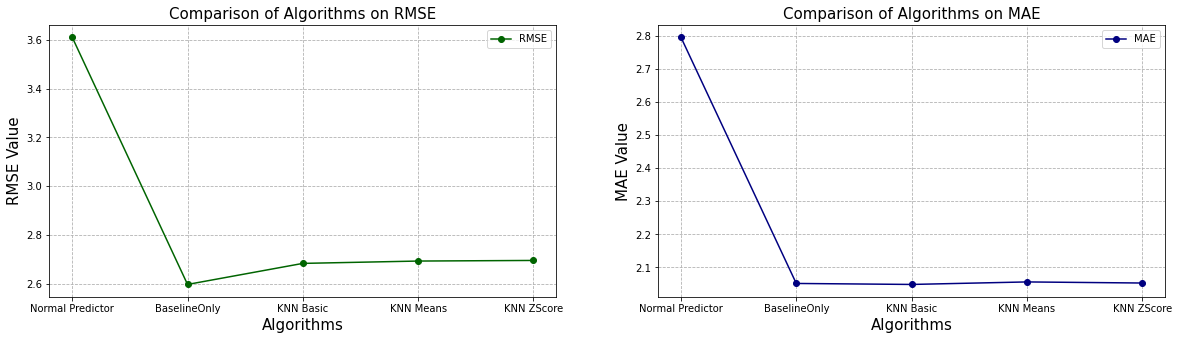

In [51]:
# Plot Performance Plots for Various Algorithms
x_algo = ['Normal Predictor','BaselineOnly','KNN Basic', 'KNN Means', 'KNN ZScore']
all_algos_cv = [normalpredictor_cv, baselineonly_cv, knnbasic_cv, knnmeans_cv, knnz_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

* BaslineOnly algoruthm gives the best results with lowest RMSE and MAE values.
* Seconf best algorithm is KNN Means as its MAE score is the lowest. RMSE scores for all KNN based algorithms are similar.
* We choose the above two for further validation.

In [52]:
# BaselineOnly algorithm gave us the best rmse, therefore, 
# we will train and predict with BaselineOnly and use Alternating Least Squares (ALS).
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([2.60999127, 2.57534487, 2.61750898]),
 'fit_time': (0.10385322570800781, 0.07274985313415527, 0.08496856689453125),
 'test_time': (0.241746187210083, 0.11771154403686523, 0.2335045337677002)}

In [53]:
# Create BaselineOnly model 
algo = BaselineOnly(bsl_options=bsl_options)

# Fit on training data
predictions = algo.fit(trainset).test(testset)

# Performance on predictions
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 2.5987


2.598699773791474

In [54]:
# Tweak parameters on KNN using GridSearchCV
from surprise.model_selection import GridSearchCV

# Define Grid
param_grid = {'k': [5, 10, 15, 20, 25, 30, 40, 50]}

# Build Models and Fit Data
knnbasic_gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnbasic_gs.fit(data)

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs.fit(data)

knnz_gs = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnz_gs.fit(data)

print('KNN Models Trained with Grid Search CV')

KNN Models Trained with Grid Search CV


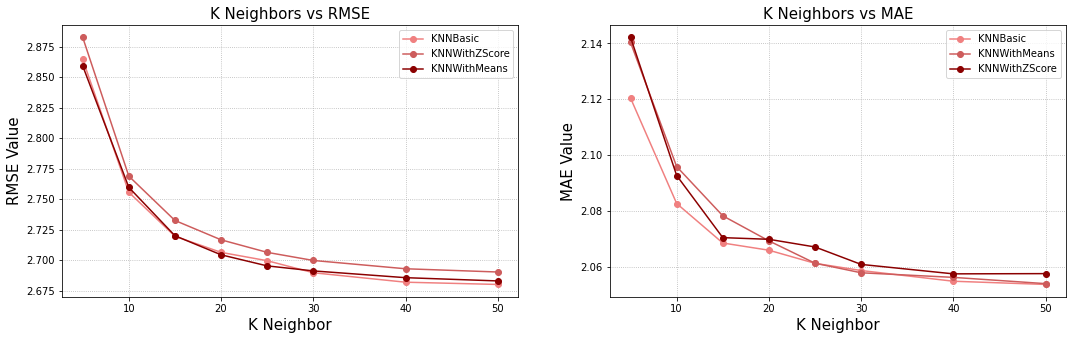

In [55]:
# Plot the results of GridSearchCV
x = [5, 10, 15, 20, 25, 30, 40, 50]
y1 = knnbasic_gs.cv_results['mean_test_rmse']
y2 = knnbasic_gs.cv_results['mean_test_mae']

y3 = knnmeans_gs.cv_results['mean_test_rmse']
y4 = knnmeans_gs.cv_results['mean_test_mae']

y5 = knnz_gs.cv_results['mean_test_rmse']
y6 = knnz_gs.cv_results['mean_test_mae']

plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x, y1, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y5, label='KNNWithZScore', color='indianred', marker='o')
plt.plot(x, y3, label='KNNWithMeans', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.subplot(1, 2, 2)
plt.title('K Neighbors vs MAE', loc='center', fontsize=15)
plt.plot(x, y2, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y4, label='KNNWithMeans', color='indianred', marker='o')
plt.plot(x, y6, label='KNNWithZScore', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.show()

# 10. In what business scenario you should use popularity based Recommendation Systems ? 

* Popularity based recommendation system works by recommending items viewed/purchased by most people and rated high.
* Recommendations are Ranked list of items by their purchase count / viewed count.
* It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.
* There is no need for the user's historical data.
* It is not a personalized recommendation and hence its business use case is restricted to recommending popular items in trend to its users.
* It can help user find item of their interest. e.g. book, movie recommendations.
* It can help item provider deliver their items to right user. e.g. inventory management
* It can identify products most relevant to the user. e.g. shopping recommendation based on trend
* Help website improve user engagement.

# 11. In what business scenario you should use CF based Recommendation Systems ? 

* It is considered to be one of the very smart recommender systems. It takes into account a user's past choices to make future predictions.
* It works on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. 
* It checks about the taste of similar users and does recommendations. 
* The similarity is not restricted to the taste of the user. 
* There can be consideration of similarity between different items also. 
* This system will give more efficient recommendations if we have a large volume of information about users and items.
* It suffers from cold start problem and requires certain amount of data to begin modelling with before giving recommenadations.
* Even if there are many users and many items that are to be recommended often, problems can arise of user and rating matrix to be sparse and will become challenging to find out about the users who have rated the same item.

# 12. What other possible methods can you think of which can further improve the recommendation for different users ?

* Other SVD (Matrix Factorization Based) Algorithms can be used with cross validation to check if we get improvement in accuracy. 
* Other Collaborative Filtering Algorithms like SlopeOne and CoClustering could also be tried. 
* But due to excess time taken during training without any output, they were not implemented in this notebook.